In [53]:
import json
import spacy
import string
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en')
nlp_light = spacy.load('en', disable=['parser', 'tagger', 'ner'])
stop_words = spacy.lang.en.stop_words.STOP_WORDS
alphabet = string.ascii_lowercase

In [95]:
with open('../data/review_decisions.json') as f:
    data = json.load(f)

## Defining Helper Functions

In [108]:
def get_review_rating_pairs(data):

    review_rating_pairs = dict()
    for doc_id in data:
        if('revisions' in data[doc_id]):
            for revision in data[doc_id]['revisions']:
                if('reviews' in data[doc_id]['revisions'][revision]):
                    for review in data[doc_id]['revisions'][revision]['reviews']:
                        if('text' in data[doc_id]['revisions'][revision]['reviews'][review] and 'decision' in data[doc_id]['revisions'][revision]['reviews'][review]):
                            if(len(data[doc_id]['revisions'][revision]['reviews'][review]['text']) > 0):
                                decision = data[doc_id]['revisions'][revision]['reviews'][review]['decision']
                                text = data[doc_id]['revisions'][revision]['reviews'][review]['text']
                                if(decision not in review_rating_pairs):
                                    review_rating_pairs[decision] = list()
                                review_rating_pairs[decision].append(text)
    
    return review_rating_pairs

In [84]:
def forbidden(word):

    if(word.lower() in stop_words):
        return True
    else:
        for character in word.lower():
            if(character in alphabet):
                return False
        return True

    return False

In [80]:
def get_classwise_word_counts(data):
    word_counts = dict()
    for decision in data:
        word_counts[decision] = Counter()
        for text in data[decision]:
            for token in nlp_light(text):
                if(not forbidden(token.text)):
                    word_counts[decision][token.text] += 1

    return word_counts

In [81]:
def get_classwise_lengths(data):

    lengths = dict()
    for decision in data:
        lengths[decision] = list()
        for text in data[decision]:
            lengths[decision].append(len(nlp_light(text)))

    return lengths

In [112]:
review_rating_pairs = get_review_rating_pairs(data)

## General Statistics

In [117]:
review_rating_pairs['Reject'][0]

"Major concerns: 1. The result that in vivo MRI can be used as a diagnostic tool to determine the time of onset of chronic inflammation is not novel 2. All images provide in the paper are poor and difficult to idendify details, especially in the histological sections. 3. There is no evidence for the inflammation in the injured spinal cord. Some immunohistochimical studies will be helpful. 4. The author mentioned that 'quantitative data of inflammation' several time in the manuscript, but inflammation in the spinal cord is not clearly shown. 5. The experimental design is not clear. The postinjury examination for MRI and histology are all in different time points. "

In [118]:
len(review_rating_pairs['Reject'])

3834

In [119]:
len(review_rating_pairs['Minor Revision'])

6644

In [120]:
len(review_rating_pairs['Major Revision'])

7103

In [152]:
total_reviews = 0
r_d = 0
r_no_d = 0
no_r_no_d = 0
no_r_d = 0
for doc_id in data:
    for revision in data[doc_id]['revisions']:
        if('reviews' in data[doc_id]['revisions'][revision]):
            for review in data[doc_id]['revisions'][revision]['reviews']:
                total_reviews += 1
                review_obj = data[doc_id]['revisions'][revision]['reviews'][review]
                if('text' in review_obj and 'decision' not in review_obj):
                    review = review_obj['text']
                    if(len(review) > 0):
                        r_no_d += 1
                    else:
                        no_r_no_d += 1

                elif('text' not in review_obj and 'decision' in review_obj):
                    no_r_d += 1
                elif('text' in review_obj and 'decision' in review_obj):
                    review = review_obj['text']
                    empty_reviews_without_ids += 1
                    if(len(review) > 0):
                        r_d += 1
                    else:
                        no_r_d += 1

In [157]:
no_r_d

32381

## Lexical Analysis

In [23]:
word_counts = get_classwise_word_counts(review_rating_pairs)

In [24]:
word_counts['Accept'].most_common(20)

[('authors', 4576),
 ('manuscript', 2800),
 ('paper', 1773),
 ('addressed', 1517),
 ('comments', 1504),
 ('data', 1276),
 ('study', 1264),
 ('concerns', 1230),
 ('publication', 1107),
 ('results', 1101),
 ('revised', 817),
 ('line', 736),
 ('previous', 660),
 ('improved', 642),
 ('et', 614),
 ('al', 609),
 ('interesting', 601),
 ('cells', 583),
 ('work', 580),
 ('think', 552)]

In [25]:
word_counts['Reject'].most_common(20)

[('authors', 15304),
 ('data', 7479),
 ('study', 6772),
 ('results', 5802),
 ('manuscript', 4617),
 ('cells', 4266),
 ('paper', 4195),
 ('different', 3795),
 ('analysis', 3505),
 ('et', 3417),
 ('al', 3390),
 ('effect', 3127),
 ('effects', 2868),
 ('line', 2855),
 ('Figure', 2626),
 ('expression', 2623),
 ('time', 2591),
 ('cell', 2514),
 ('brain', 2509),
 ('use', 2436)]

In [27]:
word_counts['Minor Revision'].most_common(20)

[('authors', 19671),
 ('data', 8106),
 ('study', 7597),
 ('line', 7481),
 ('results', 7305),
 ('manuscript', 6646),
 ('paper', 6273),
 ('cells', 4733),
 ('Figure', 4387),
 ('different', 4377),
 ('Page', 4173),
 ('et', 4043),
 ('al', 4022),
 ('effect', 3586),
 ('discussion', 3526),
 ('analysis', 3412),
 ('page', 3315),
 ('use', 3276),
 ('expression', 3201),
 ('effects', 3199)]

In [28]:
word_counts['Major Revision'].most_common(20)

[('authors', 33368),
 ('data', 15374),
 ('results', 13360),
 ('study', 12939),
 ('manuscript', 9468),
 ('line', 8614),
 ('cells', 8023),
 ('paper', 7837),
 ('different', 7802),
 ('analysis', 7650),
 ('et', 7341),
 ('al', 7322),
 ('Figure', 6968),
 ('effect', 6434),
 ('effects', 6055),
 ('time', 5645),
 ('Page', 5489),
 ('expression', 5423),
 ('use', 5349),
 ('brain', 5280)]

## Length

In [29]:
lengths = get_classwise_lengths(review_rating_pairs)

In [31]:
np.mean(lengths['Reject'])

605.5576421491915

In [32]:
np.mean(lengths['Accept'])

98.48509828788839

In [33]:
np.mean(lengths['Major Revision'])

728.464451640152

In [34]:
np.mean(lengths['Minor Revision'])

470.5680313064419

In [49]:
np.std(lengths['Accept'])

152.27603573396604

In [50]:
np.std(lengths['Reject'])

473.5232359913895

In [51]:
np.std(lengths['Major Revision'])

513.4513671794081

In [52]:
np.std(lengths['Minor Revision'])

365.4278648659776

Text(0.5,1,'Accept')

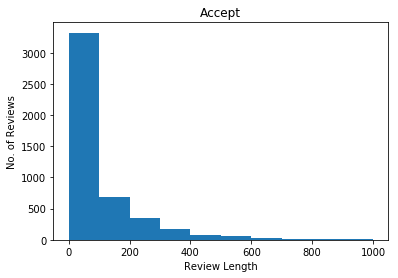

In [66]:
plt.hist(lengths['Accept'], bins=10, range=(0,1000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Accept')

Text(0.5,1,'Reject')

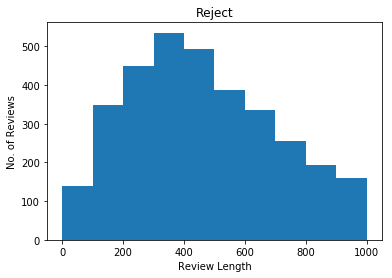

In [67]:
plt.hist(lengths['Reject'], bins=10, range=(0,1000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Reject')

Text(0.5,1,'Major Revision')

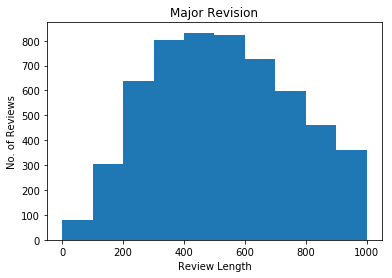

In [68]:
plt.hist(lengths['Major Revision'], bins=10, range=(0,1000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Major Revision')

Text(0.5,1,'Minor Revision')

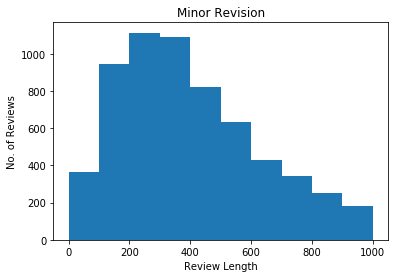

In [69]:
plt.hist(lengths['Minor Revision'], bins=10, range=(0,1000))
plt.xlabel('Review Length')
plt.ylabel('No. of Reviews')
plt.title('Minor Revision')

## Group by Revision

{'54221': {'text': "Major concerns: 1. The result that in vivo MRI can be used as a diagnostic tool to determine the time of onset of chronic inflammation is not novel 2. All images provide in the paper are poor and difficult to idendify details, especially in the histological sections. 3. There is no evidence for the inflammation in the injured spinal cord. Some immunohistochimical studies will be helpful. 4. The author mentioned that 'quantitative data of inflammation' several time in the manuscript, but inflammation in the spinal cord is not clearly shown. 5. The experimental design is not clear. The postinjury examination for MRI and histology are all in different time points. ",
  'decision': 'Reject'},
 '53383': {'text': "This paper 'In Vivo MRI View of Chronic Inflammation in Injured Rat Spinal Cord: Onset, Progression and Effective Intervention' provided the T2-weighted sagittal images of either untreated or irradiated severed rat spinal cords from day 5 until 4 months postinju